###**DATA**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [13]:
df_loan = pd.read_csv('loan_approval_dataset.csv')
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


###**EDA**

In [14]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
df_loan.rename(columns={' education': 'education',
                          ' no_of_dependents': 'no_of_dependents',
                          ' self_employed': 'self_employed',
                          ' income_annum': 'income_annum',
                          ' loan_amount': 'loan_amount',
                          ' loan_term': 'loan_term',
                          ' cibil_score': 'cibil_score',
                          ' credit_history': 'credit_history',
                          ' property_area': 'property_area',
                          ' application_type': 'application_type',
                          ' loan_status': 'loan_status'}, inplace=True)
df_loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [20]:
from sklearn.preprocessing import OrdinalEncoder
order_categories = [[' Not Graduate', ' Graduate']]
OrdEnc = OrdinalEncoder(categories = order_categories)
df_loan['education'] = OrdEnc.fit_transform(df_loan[['education']])
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [24]:
order_categories_status = [[' Rejected', ' Approved']]
OrdEnc = OrdinalEncoder(categories = order_categories_status)
df_loan['loan_status'] = OrdEnc.fit_transform(df_loan[['loan_status']])
df_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_loan['self_employed'] = label_encoder.fit_transform(df_loan['self_employed'])
df_loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0.0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1.0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1.0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0.0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1.0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0.0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0.0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0.0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [31]:
df_loan = df_loan.drop('loan_id', axis=1)
df_loan

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1.0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,0,0.0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,1.0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,3,1.0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,0.0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1.0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0.0
4265,0,0.0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1.0
4266,2,0.0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0.0
4267,1,0.0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1.0


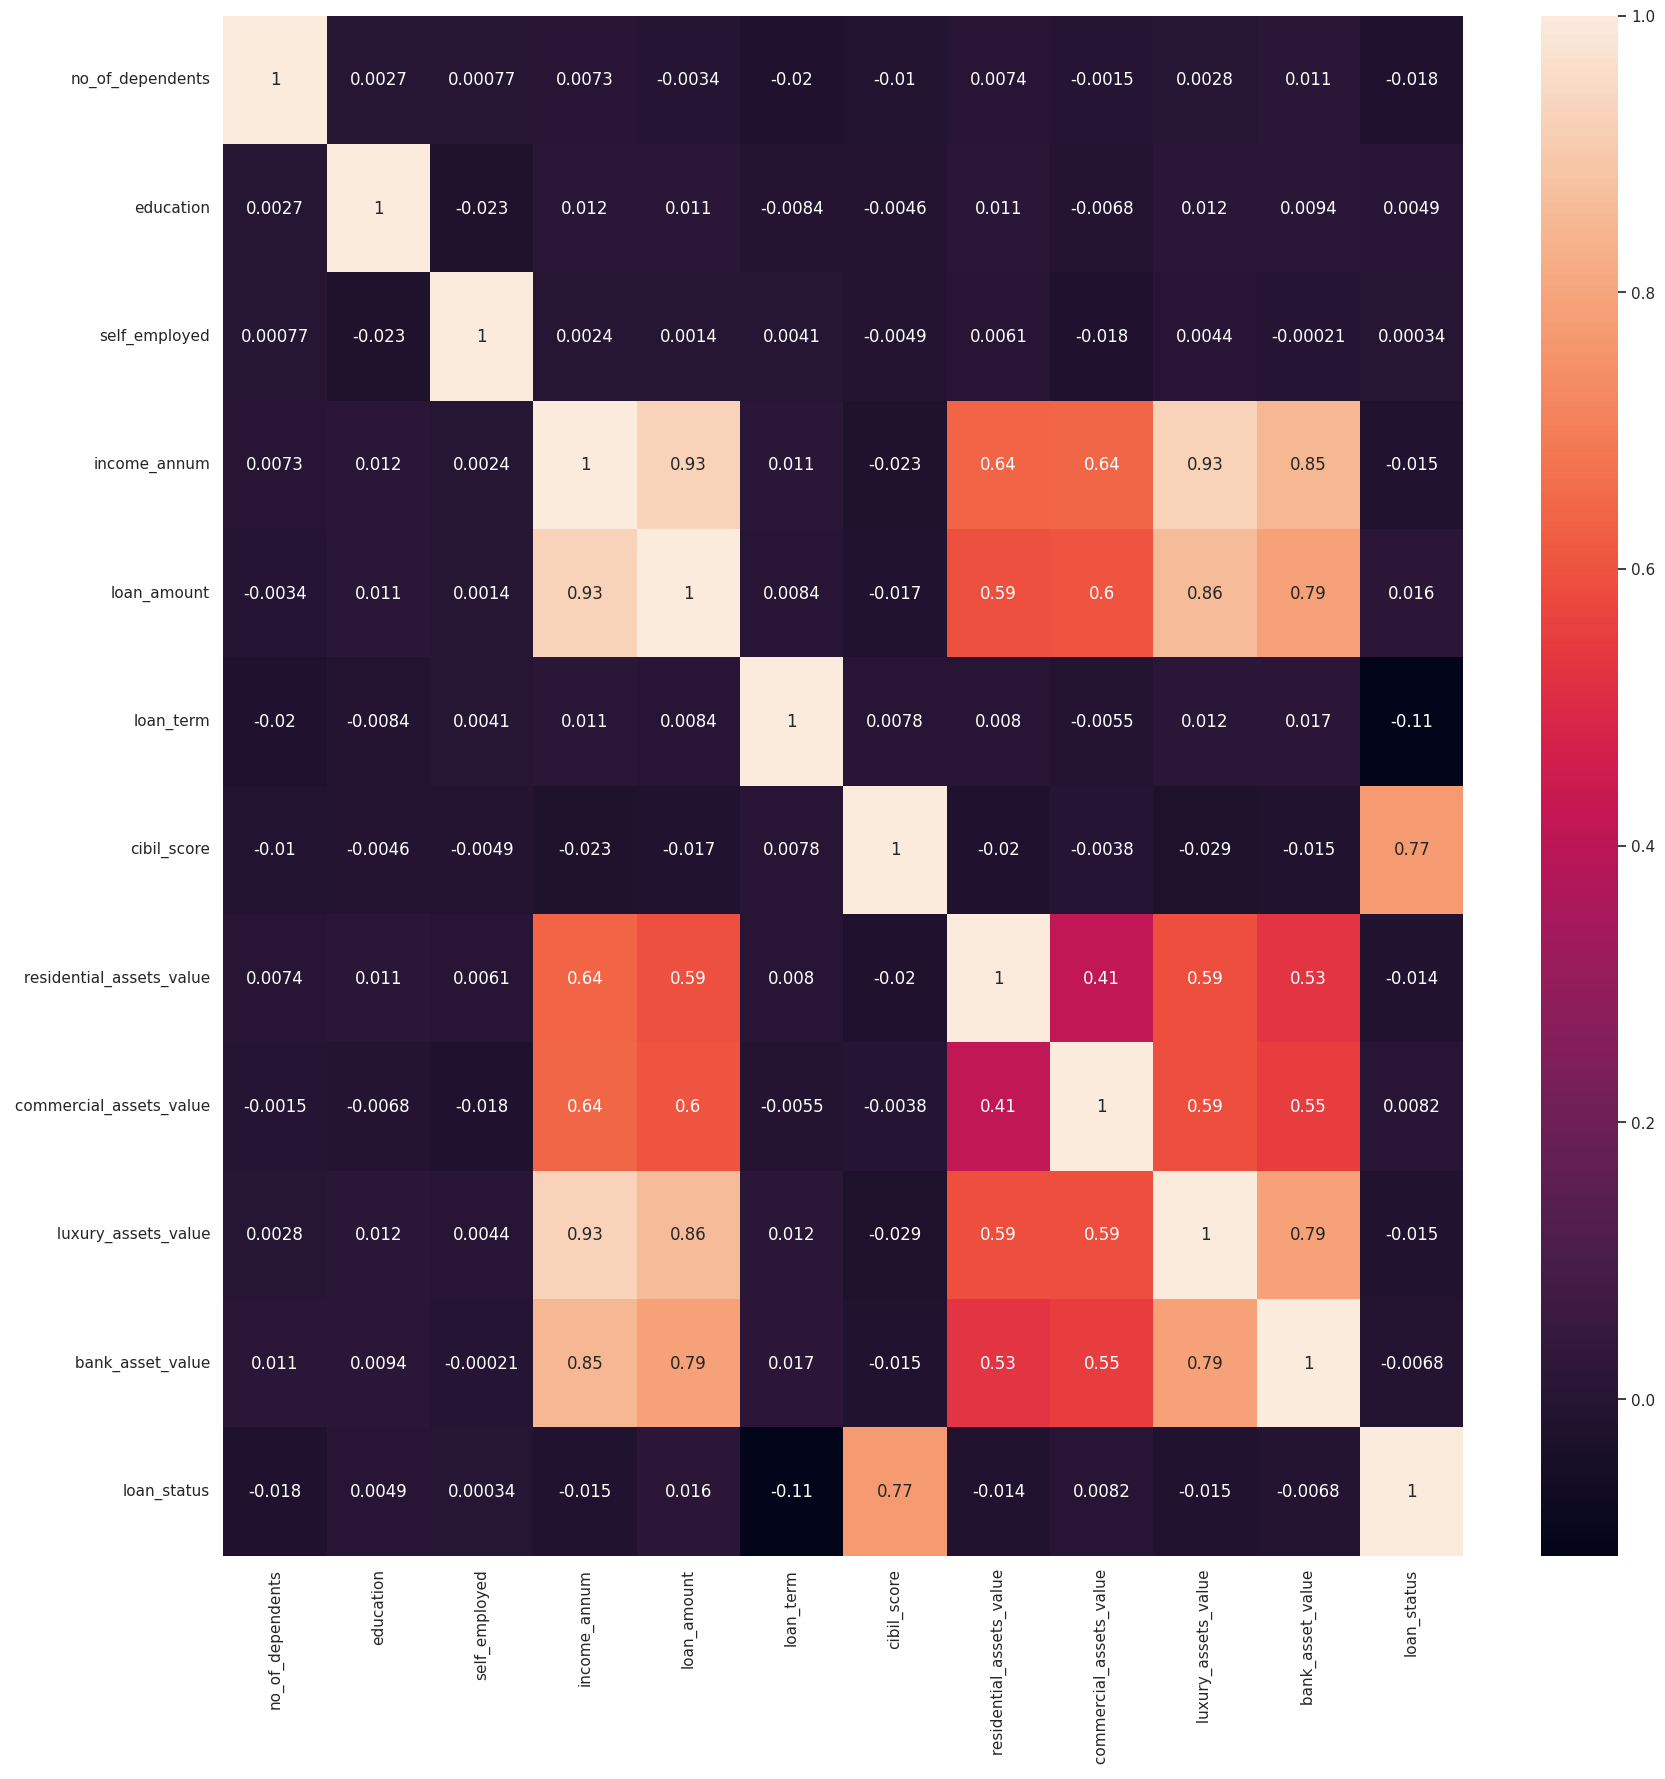

In [32]:
sns.heatmap(df_loan.corr(), annot=True)
sns.set(rc={'figure.figsize':(20, 20)})

###**TRAIN - TEST**

In [46]:
X = df_loan[['cibil_score']]
y = df_loan['loan_status']

In [47]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

###**CLASSIFICATION**

In [48]:
clasificator = LogisticRegression()
clasificator.fit(train_x,train_y)

LogisticRegression()

In [49]:
ypred = clasificator.predict(test_x)

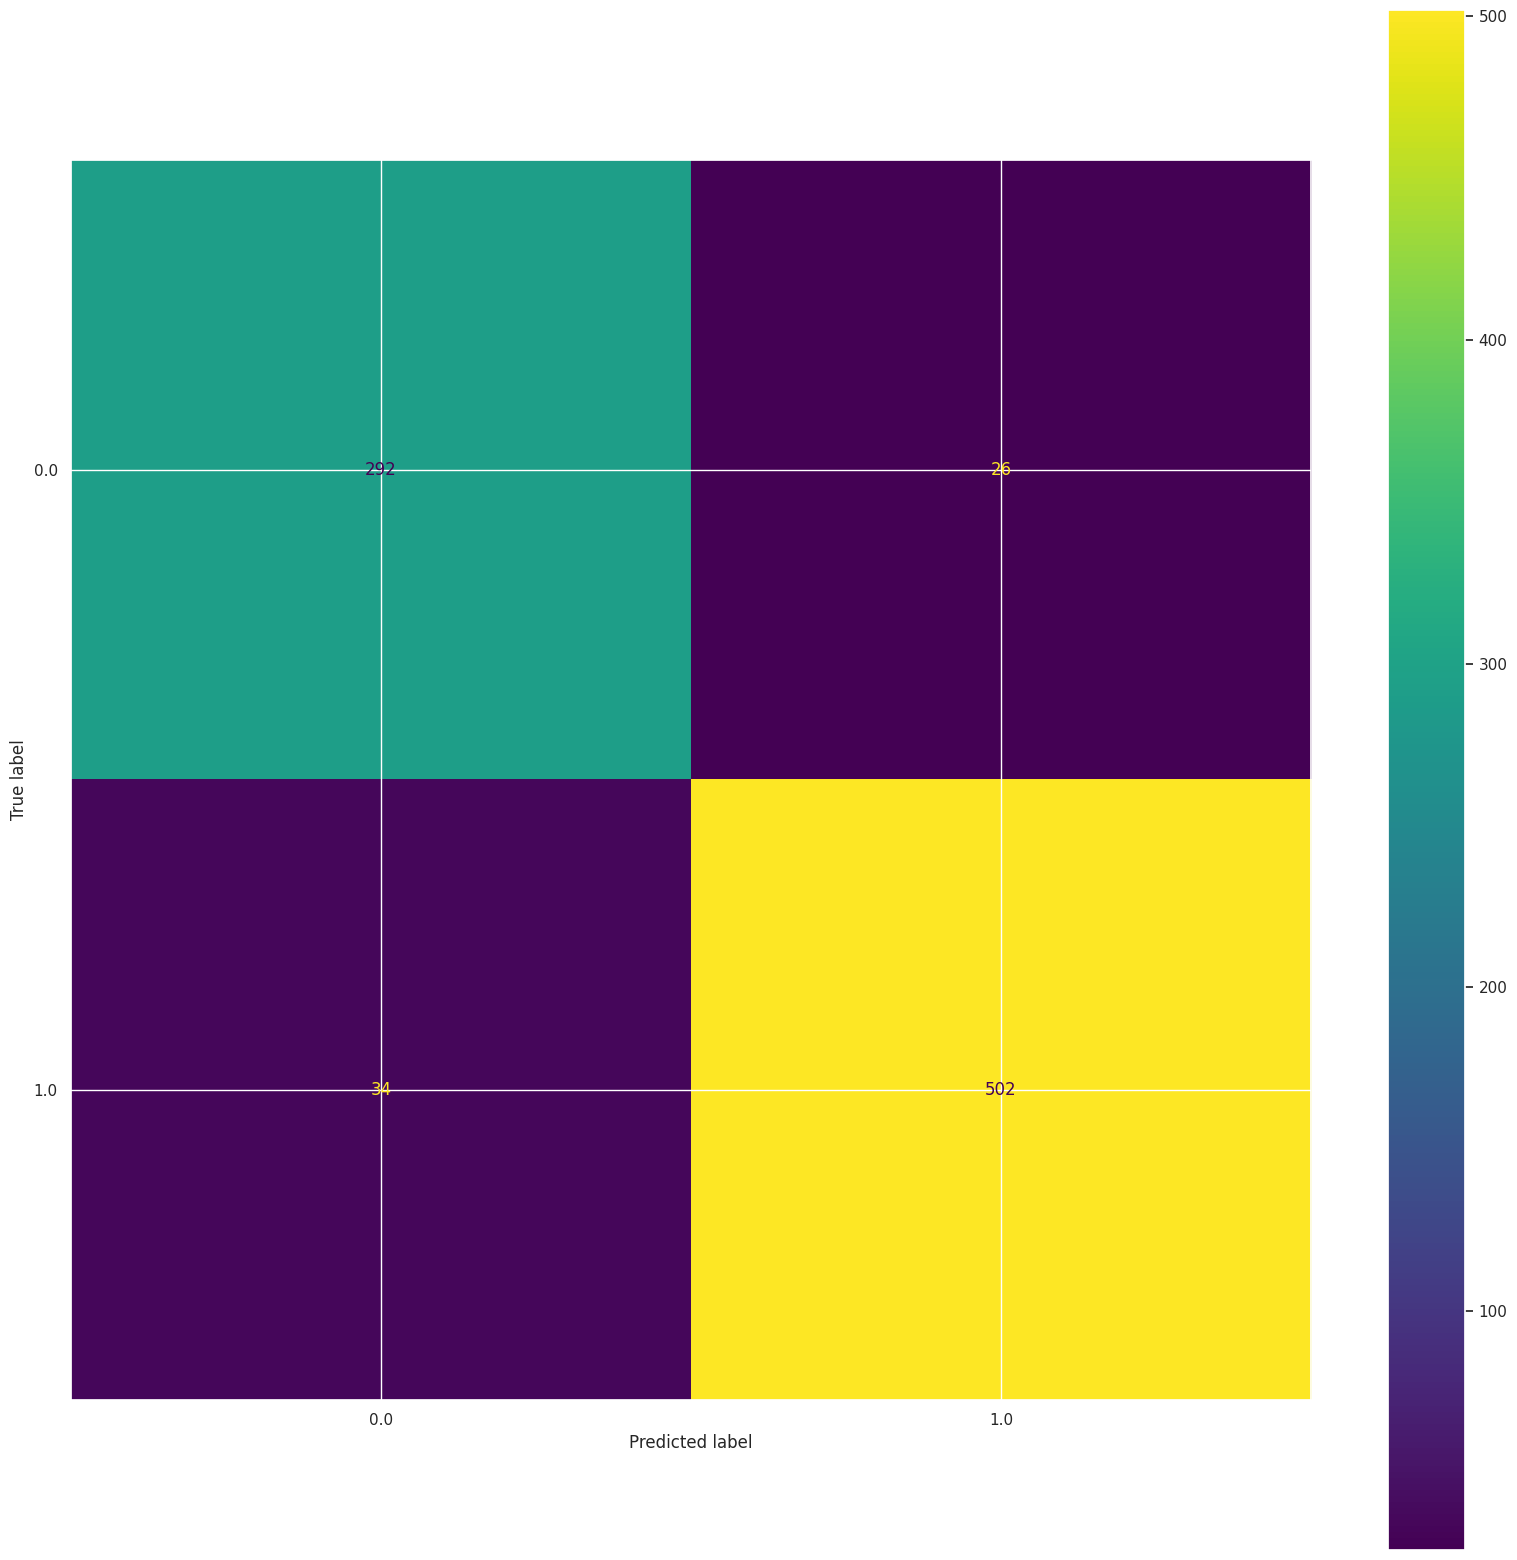

In [50]:
cm = confusion_matrix(test_y, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificator.classes_)
disp.plot()

In [51]:
print(classification_report(test_y, ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       318
         1.0       0.95      0.94      0.94       536

    accuracy                           0.93       854
   macro avg       0.92      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

